In [1]:
save_name = 'ResNet34_Oversample_L2_Sum_PosWeight_12_Targets'

In [2]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks\ModelRuns
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [3]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [4]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [5]:
out_channels=12
net_kwargs = {'layers':34, 'drop_out_precent':.5, 'out_channels':out_channels} #18, 34, 50, 101, 152
net = ResNet_GrayScale(**net_kwargs) 

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

In [6]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=64, 
                                     learning_rate=1e-5, 
                                     num_epochs=2,
                                     device=device, 
                                     net=net,
                                     save_path= f'notebooks/ModelRuns/saved/{save_name}/',
                                     net_name = 'ResNet_GrayScale',
                                     net_kwargs = net_kwargs)

Total Oversampled Rows Added to Train: 75,862

Number of Training Images: 181,067
Number of Validation Images: 26,543

Positive Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum     5.378069
Cardiomegaly                   3.569168
Lung_Opacity                   1.047158
Lung_Lesion                    5.657365
Edema                          2.686668
Consolidation                  4.818161
Pneumonia                      8.335275
Atelectasis                    3.173974
Pneumothorax                   5.385266
Pleural_Effusion               1.526293
Pleural_Other                 10.307500
Fracture                       6.351482
dtype: float64

In [7]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/2]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 2082748.1462         
Time of Completion: 2020-08-03 01:19:44.832076          
Training Duration: 0:33:40.193357          
Validation Duration: 0:02:40.017232

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,39628,77323,0.644822,0.330471,0.436986,0.703941,0.436531
4,Edema,49114,82207,0.696726,0.416254,0.521150,0.732044,0.486846
5,Consolidation,31121,72419,0.624530,0.268383,0.375430,0.698915,0.391061
7,Atelectasis,43380,88036,0.576902,0.284270,0.380867,0.589542,0.315332
9,Pleural_Effusion,71673,86983,0.625382,0.515308,0.565034,0.670554,0.556233



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2968,4106,0.362197,0.261812,0.303930,0.717740,0.239686
4,Edema,6166,11817,0.744729,0.388593,0.510705,0.760809,0.459155
5,Consolidation,1589,2858,0.171177,0.095171,0.122330,0.607722,0.083754
7,Atelectasis,4168,14392,0.639395,0.185172,0.287177,0.582197,0.192411
9,Pleural_Effusion,9032,9593,0.586360,0.552069,0.568698,0.740436,0.560771


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/2]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1705018.1795         
Time of Completion: 2020-08-03 01:54:55.259627          
Training Duration: 0:32:40.908577          
Validation Duration: 0:02:27.578166

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,39628,62113,0.728147,0.464557,0.567225,0.830272,0.654103
4,Edema,49114,76852,0.758725,0.484880,0.591652,0.806052,0.597335
5,Consolidation,31121,54526,0.692555,0.395279,0.503298,0.818559,0.628081
7,Atelectasis,43380,76874,0.622430,0.351237,0.449066,0.694126,0.478691
9,Pleural_Effusion,71673,85548,0.678414,0.568383,0.618543,0.735183,0.636767



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2968,3437,0.375674,0.324411,0.348165,0.756275,0.298674
4,Edema,6166,13171,0.802952,0.375902,0.512075,0.768149,0.471081
5,Consolidation,1589,3638,0.234739,0.102529,0.142720,0.621928,0.092922
7,Atelectasis,4168,8483,0.410029,0.201462,0.270176,0.594270,0.196096
9,Pleural_Effusion,9032,12275,0.723428,0.532301,0.613320,0.760042,0.587754


Training Duration: 1:11:32.411396



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.070698
Hamming Loss,0.256169
Hamming Accuracy,0.743831
Combined Recall,0.559423
Combined Precision,0.391042
Combined F1,0.431125


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,28389,50925,0.684807,0.381757,0.490229,0.823958,0.635104
1,Cardiomegaly,39628,62113,0.728147,0.464557,0.567225,0.830272,0.654103
2,Lung_Opacity,88448,93903,0.609183,0.573794,0.590959,0.626146,0.597991
3,Lung_Lesion,27198,49051,0.726487,0.402826,0.518276,0.855167,0.671039
4,Edema,49114,76852,0.758725,0.484880,0.591652,0.806052,0.597335
5,Consolidation,31121,54526,0.692555,0.395279,0.503298,0.818559,0.628081
6,Pneumonia,19396,42130,0.755517,0.347828,0.476351,0.879258,0.667951
7,Atelectasis,43380,76874,0.622430,0.351237,0.449066,0.694126,0.478691
8,Pneumothorax,28357,56417,0.712699,0.358225,0.476797,0.824873,0.606382
9,Pleural_Effusion,71673,85548,0.678414,0.568383,0.618543,0.735183,0.636767


***** ROC *****


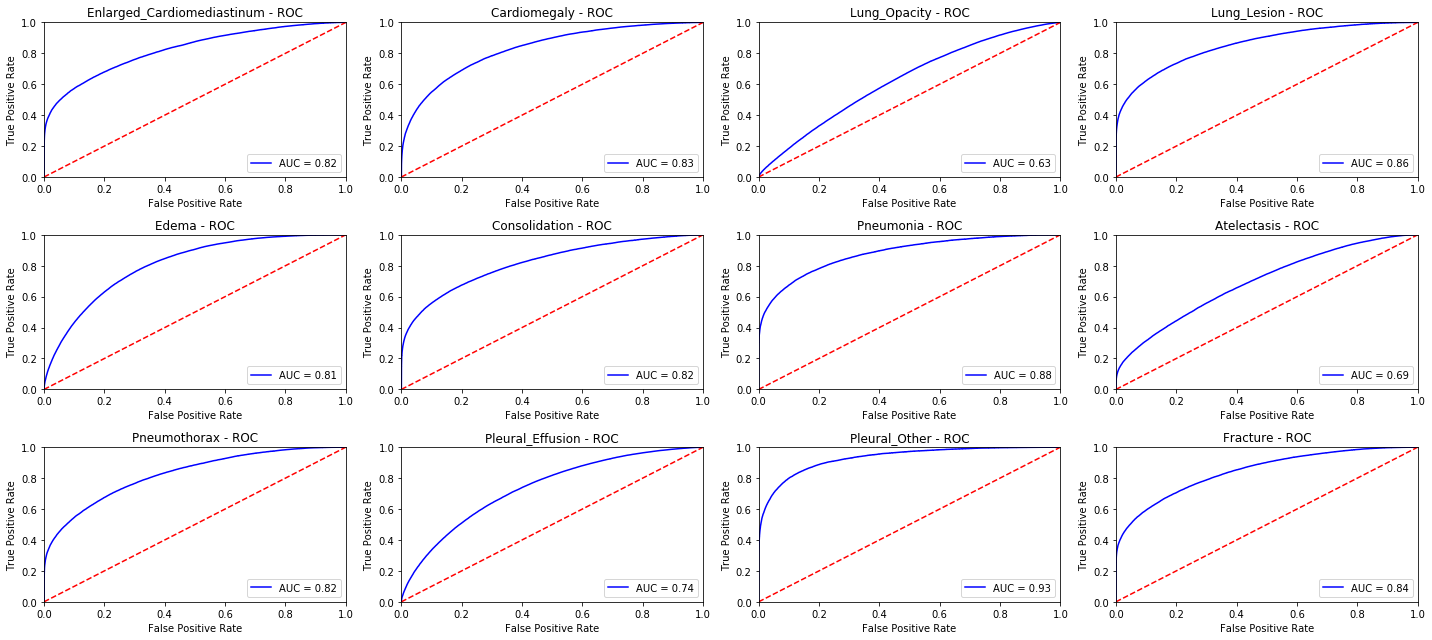

***** Precision / Recall *****


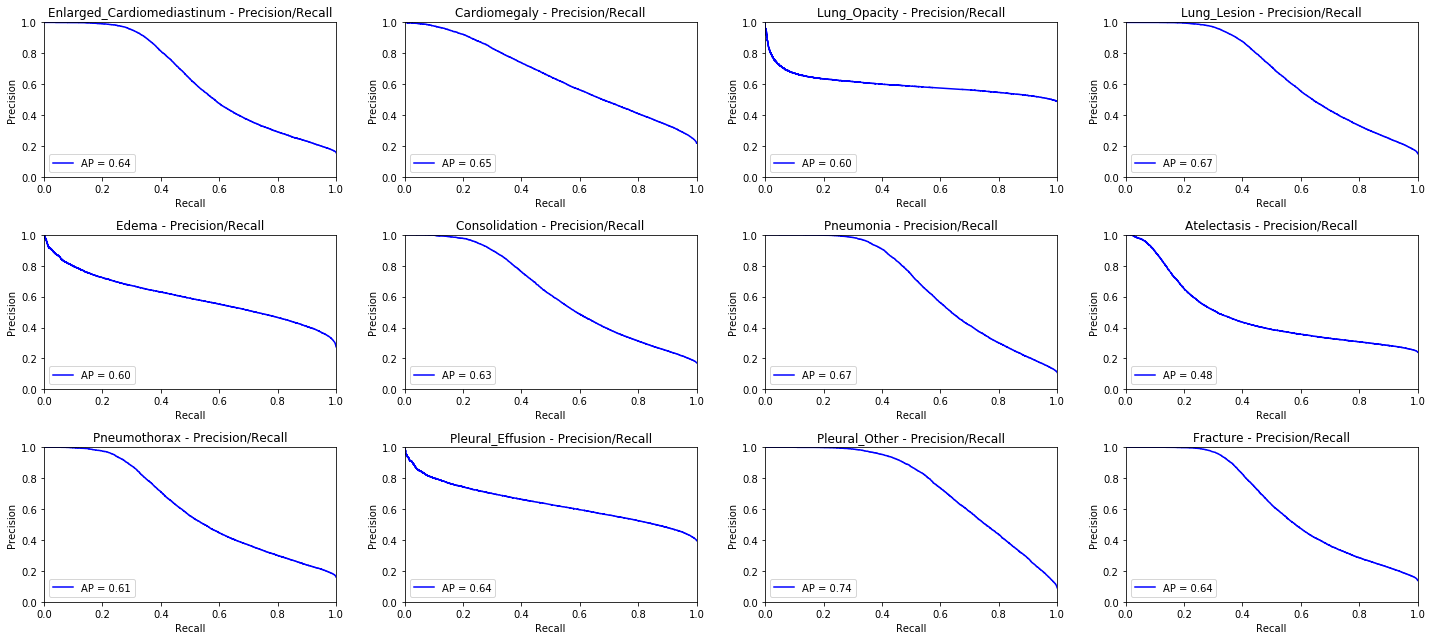


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.073240
Hamming Loss,0.210583
Hamming Accuracy,0.789417
Combined Recall,0.436456
Combined Precision,0.263757
Combined F1,0.305644


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1360,715,0.069853,0.132867,0.091566,0.578662,0.076578
1,Cardiomegaly,2968,3437,0.375674,0.324411,0.348165,0.756275,0.298674
2,Lung_Opacity,12046,14266,0.670430,0.566101,0.613864,0.663134,0.584248
3,Lung_Lesion,1145,2020,0.149345,0.084653,0.108057,0.637403,0.069609
4,Edema,6166,13171,0.802952,0.375902,0.512075,0.768149,0.471081
5,Consolidation,1589,3638,0.234739,0.102529,0.142720,0.621928,0.092922
6,Pneumonia,728,3257,0.214286,0.047897,0.078294,0.597343,0.040977
7,Atelectasis,4168,8483,0.410029,0.201462,0.270176,0.594270,0.196096
8,Pneumothorax,2167,5071,0.371943,0.158943,0.222713,0.656757,0.152650
9,Pleural_Effusion,9032,12275,0.723428,0.532301,0.613320,0.760042,0.587754


***** ROC *****


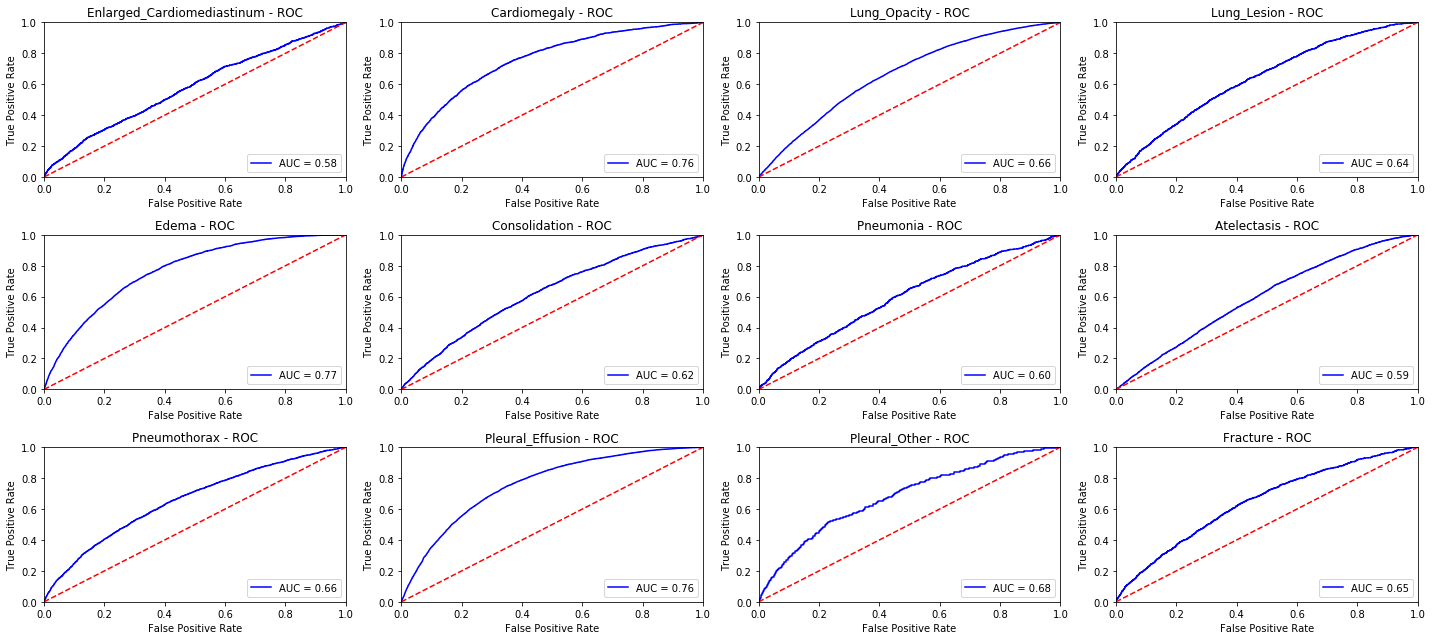

***** Precision / Recall *****


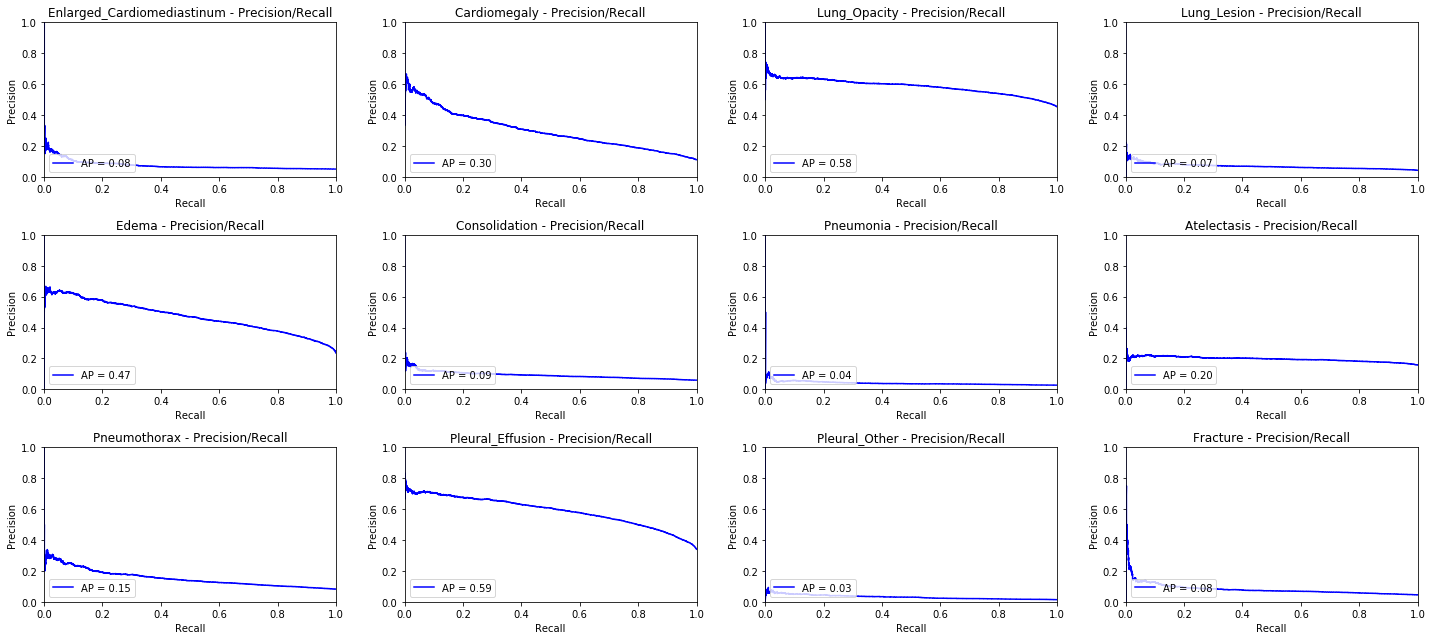

In [8]:
standardTraining.displayMetrics()


ACCURACY

▔▔▔▔


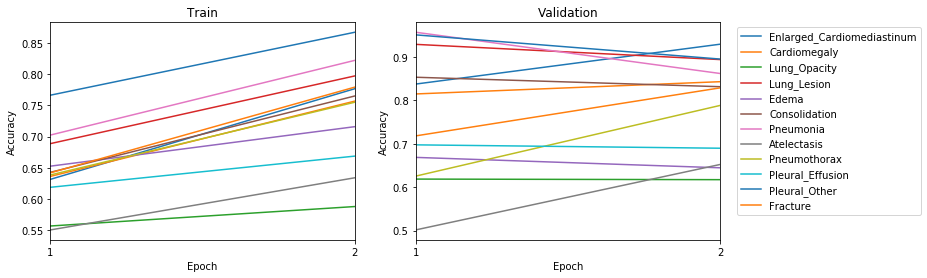


RECALL

▔▔▔


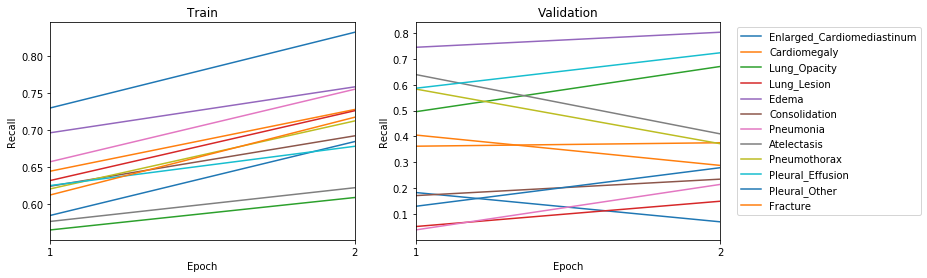


PRECISION

▔▔▔▔▔▔


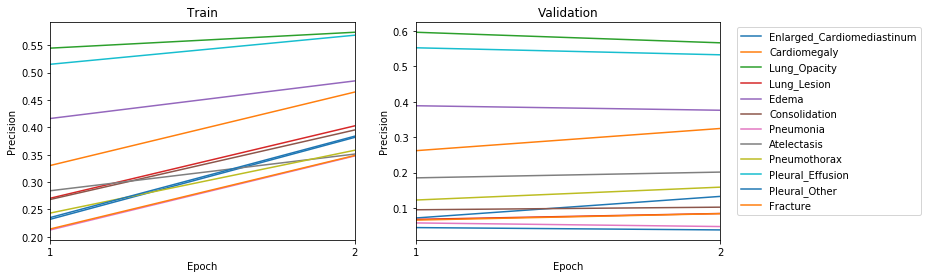


F1

▔


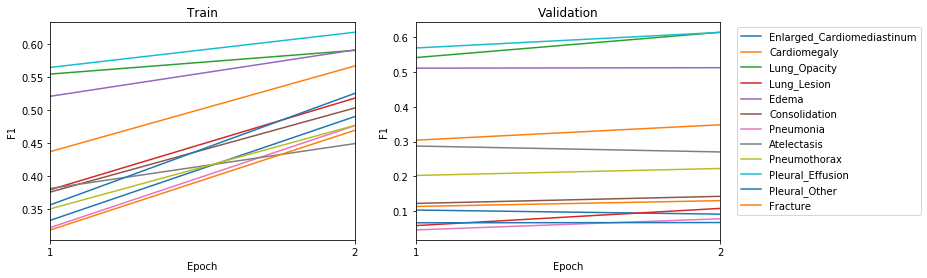


ROC AUC

▔▔▔▔


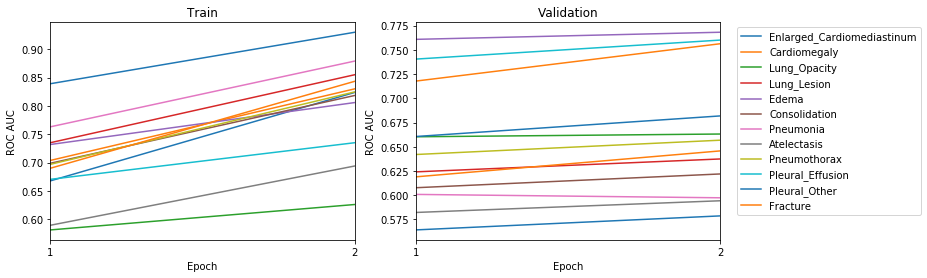


AVERAGE PRECISION

▔▔▔▔▔▔▔▔


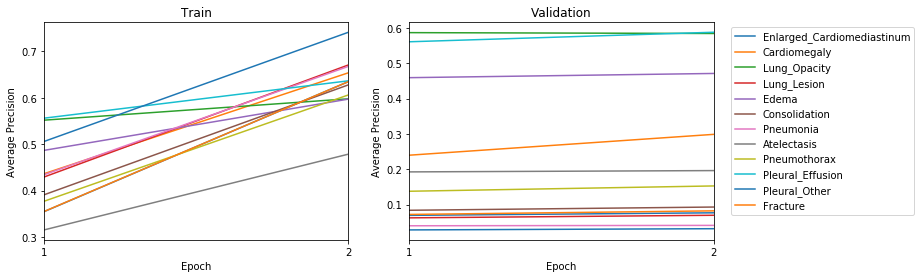

In [9]:
standardTraining.displayEpochProgression()

In [10]:
standardTraining.save()